## Time Series Analysis

This project is aimed at applying traditional time series methods to analyse and forecast foreign exchange rate of USD/INR

##  Python Libraries
### We import the following python libraries that will be useful for the purpose of making sense out of our data:

1. NumPy: It is the fundamental package for numerical computation in Python which is known for it's array-oriented computation for better efficiency and is extensively use in data analysis.

2. Pandas: It is the most popular and widely used Python library for data science which enables to clean and process our data and contains high-level data structures and manipulation tools.

3. Matplotlib: This is a powerful plotting library which produces beautiful visualizations and supports low memory consumption and better runtime behaviour.

4. Seaborn: It is a visualization library for statistical graphics plotting in Python and is built on the top of matplotlib library.

In [12]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt
import itertools

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import colors
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data set
df = pd.read_csv("C:\\Users\\khemk\\OneDrive\\Desktop\\USD_INR.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-09-2019,71.680298,72.620003,70.365997,70.498703,70.498703,0
1,01-10-2019,70.638000,71.760002,70.606499,70.989998,70.989998,0
2,01-11-2019,71.272499,72.360001,70.471497,71.722000,71.722000,0
3,01-12-2019,71.723000,71.959999,70.471001,71.310997,71.310997,0
4,01-01-2020,71.275803,72.500000,70.606499,71.639999,71.639999,0


We will mainly work with the 'Close' column

In [8]:
df = df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [9]:
df

,Date,Close
0,01-09-2019,70.498703
1,01-10-2019,70.989998
2,01-11-2019,71.722000
3,01-12-2019,71.310997
4,01-01-2020,71.639999
...,...,...
56,01-05-2024,83.320900
57,01-06-2024,83.450897
58,01-07-2024,83.738998
59,01-08-2024,83.988998


## Introduction to Time Series 


Every company in this world faces certain challenges and risks such as high compeition , failure of technology, labour unrest, inflation, recession, and change in government laws. Thus we can say that every buisness operates under risk and uncertainity. That's why forecast is necessary to lessen the adverse effect of the risks and to tell us in advance of any incoming dangers. There are various methods of forecast- mostly commonly used are :-



1. Regression


2. Data Mining Mehthods


3. Time Series


Why these different teechniques are required for forecasting? The reason is that we have to deal with different types of data which possess different features , so to handle this different techniques are used for forecasting. For example, In case of regression or CART we have one response and a number of predictors.

Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. Businesses utilize forecasting to determine how to allocate their budgets or plan for anticipated expenses for an upcoming period of time.


## What is Time Series? 


A time series is a series of measurements on the same variable collected over time. These measurements are made at regular time intervals.A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

Intervals of the Time Series Data

1. Yearly :- GDP , Macro-economic series

2. Quarterly :- Revenue of a company.

3. Monthly:- Sales, Expenditure, salary

4. Weekly:- Demand , Price of Petrol and diesal

5. Daily:- Closing price of stock, sensex value, daily transaction of ATM machine

6. Hourly:- AAQI


Time series analysis can be useful to see how a given asset, security, or economic variable changes over time. It can also be used to examine how the changes associated with the chosen data point compare to shifts in other variables over the same time period.

## Features of the Time Series Data 

The following features mentioned below makes the time series analysis challenging and none of the other machine learning techniques applicable because of the following reasons :-

1. Data are depedent on each other.


2. In the case of time series , ordering of data matters a lot.


3. Ordering is very significant because there is dependency and changing the order will change the data structure.


Please note that in case where data is cross sectional , order of the obeservation does not matter but if the data is time series order of all the observations are important.

## Time Series Assumptions 

Some of the most common assumptions made for time series are based on the common sense. But always Keep in mind one thing

1. Very long range forecasts does not work well !!

2. Forecast is done by keeping in mind that the market and the other conditions are not going to change in the future.

3. There will be not any change in the market.

4. But the change is gradual and not a drastic change.

5. Situations like recession in 2008 US market will send the forecasts into a tizzy.

6. Events like demonetization would throw the forecasts into disarray


Based on the data available , we should not try to forecast for more than a few periods ahead.

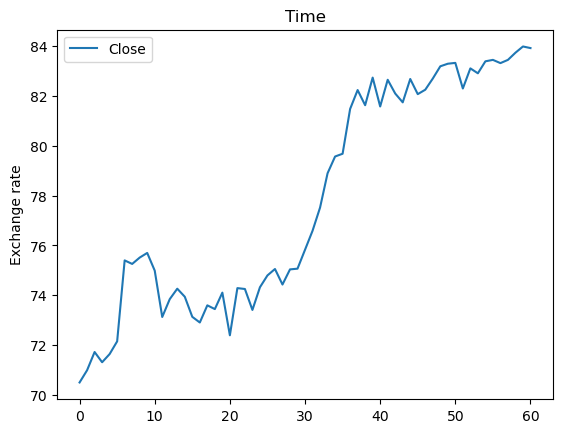

In [10]:
df.plot()
plt.ylabel('Exchange rate')
plt.title('Time')
plt.show()

## Components of the Time Series 

The components of the time series are following :-

### Trend :- A gradual shift or movement to relatively higher or lower values over a long period of time.

 1. When the time series analysis shows a general trend , that is upward . It is called uptrend.
 2. When the time series analysis shows a general trend , that is downward. It is called downtrend.
 3. When there is no trend, we call it horizontal or stationary trend.



### Seasonality :- It means upward or downward swings. Repeating periods within a fixed period of time. It is usually observed within a period of time.For example , if you live in a country with cold winters and hot summers, your air conditioning costs goes high in summer and low in winters.


### Cyclic Patterns :- It refers to repeating up and down movements. It usually go over more than a year of time.It is much harder to predict.


### Irregular :- It refers to erratic, unsystematic, 'residual' flutuations. It is for short duration and non repeating. It happens due to random variations or unforeseen events. It generally contains the white noise which we will see in the coming sections.



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Close   61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [16]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

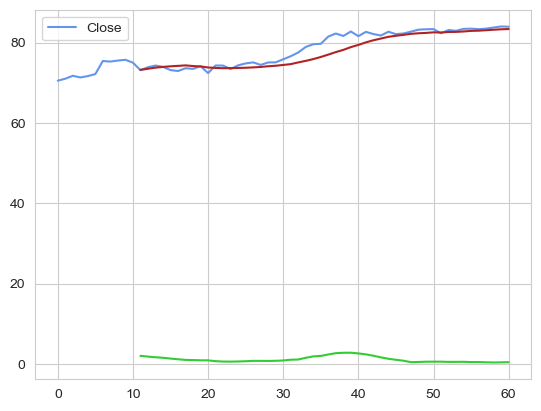

In [19]:
df.plot(color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')

In [21]:
# Convert the DataFrame column to a pandas Series
time_series = df['Close']  # Replace 'Your_Column_Name' with the actual column name

# Convert the entire DataFrame to a pandas Series
df1 = df['Close'].values  # Replace 'Your_Column_Name' with the actual column name

# Split indices for train and test sets
train_indices = slice(0, len(df1) - 10)
test_indices = slice(len(df1) - 10, None)

# Create train and test DataFrames
train = pd.DataFrame({'value': df1[train_indices]}, index=df.index[train_indices])
test = pd.DataFrame({'value': df1[test_indices]}, index=df.index[test_indices])

# Print the shapes of train and test DataFrames
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (51, 1)
Test Shape: (10, 1)


In [22]:
train

,value
0,70.498703
1,70.989998
2,71.722000
3,71.310997
4,71.639999
5,72.150002
6,75.400002
7,75.258499
8,75.513199
9,75.699997


In [23]:
test

,value
51,82.302002
52,83.109703
53,82.911903
54,83.392998
55,83.451103
56,83.320900
57,83.450897
58,83.738998
59,83.988998
60,83.925003


<Figure size 1000x600 with 0 Axes>

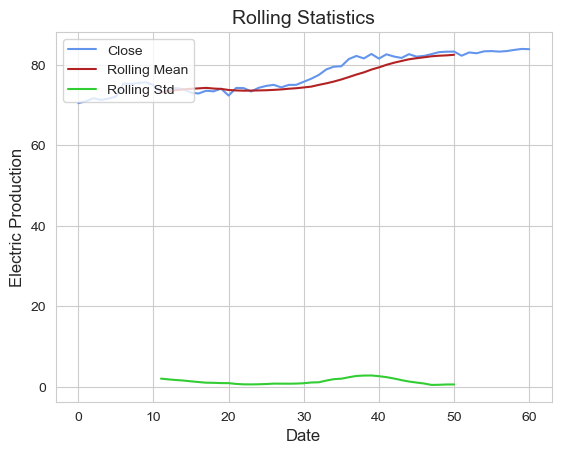

In [25]:
rolling_mean = train.rolling(window=12).mean()
rolling_std = train.rolling(window=12).std()
plt.figure(figsize = (10,6))
df.plot(color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()

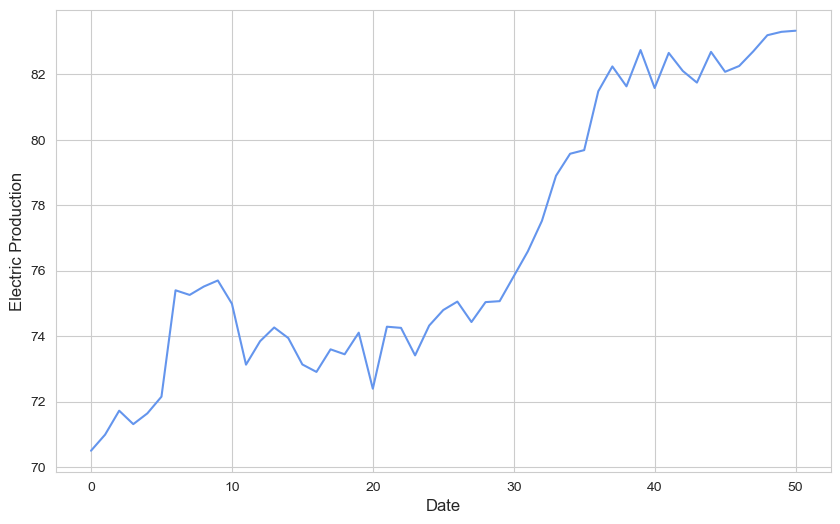

In [27]:
plt.figure(figsize = (10,6))
plt.plot(train['value'], color = 'cornflowerblue')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size = 12)
plt.show()

## Formal Test for Stationarity


### Augmented Dickey Fuller Test


In [28]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    
    # Define null and alternative hypotheses
    print('\nNull Hypothesis: The time series has a unit root (non-stationary)')
    print('Alternative Hypothesis: The time series does not have a unit root (stationary)\n')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
​
    
    # Compare the p-value to the significance level (commonly 0.05)
    p_value = dfoutput['p-value']
    alpha = 0.05
    if p_value <= alpha:
        print('\nReject the null hypothesis. The time series does not have a unit root (stationary).')
    else:
        print('\nFail to reject the null hypothesis. The time series has a unit root (non-stationary).')
​
# Call the function and run the test
d = 0
​
if d == 0:
    adf_test(train['value'])
else:
    adf_test(train['value'].diff(periods=d).dropna())


SyntaxError: invalid non-printable character U+200B (783922070.py, line 13)